<h1>FIFA Project</h1>
<h3>Goal</h3>
<p>To scrape world cup data from wikipedia and plot them as many various plots</p>

In [2]:
# Wikipedia article is List of FIFA World Cup finals
import pandas as pd
import numpy as np

# Scraped all the tables in the fifa winners wiki page and stored them in a list
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_finals')

# Get the list of FIFA finals table
fifa_tables = tables[3]
print(fifa_tables)


              Year          Winners                 Score[2]       Runners-up  \
0             1998           France                      3–0           Brazil   
1             2002           Brazil                      2–0          Germany   
2             2006            Italy  1–1 (a.e.t.) (5–3 pen.)           France   
3             2010            Spain             1–0 (a.e.t.)      Netherlands   
4             2014          Germany             1–0 (a.e.t.)        Argentina   
5             2018           France                      4–2          Croatia   
6  Upcoming finals  Upcoming finals          Upcoming finals  Upcoming finals   
7             Year        Finalists                    Match        Finalists   
8             2022              NaN                        v              NaN   
9             2026              NaN                        v              NaN   

                   Venue                     Location       Attendance  \
0        Stade de France  Saint-De

In [3]:
# Getting a copy of the list of finals table to work with
finals_tabel = fifa_tables.copy()

# Changing the index of finals_table to year
finals_tabel.set_index('Year', inplace=True)

# Reindexing to get necessary tables: Winners and Runners-up
finals_tabel_useful = finals_tabel.reindex(columns=['Winners', 'Runners-up'])

# Removing unnecessary rows: Upcoming finals, Year, 2022, 2026
finals_tabel_useful = finals_tabel_useful.drop(index=['Upcoming finals', 'Year', '2022', '2026'])

# Since West and East Germany combined to from Germany we replace West Germany with Germany
finals_tabel_useful.replace('West Germany', 'Germany', inplace=True)
print(finals_tabel_useful)

      Winners   Runners-up
Year                      
1998   France       Brazil
2002   Brazil      Germany
2006    Italy       France
2010    Spain  Netherlands
2014  Germany    Argentina
2018   France      Croatia


In [4]:
# Importing UEFA association information
uefa_list = pd.read_html('https://en.wikipedia.org/wiki/UEFA')

# Isolating UEFA member country table
uefa = uefa_list[3].copy()
print(uefa)

   Code             Association                  National teams    Founded  \
0   ALB                 Albania  Men'sU21U19U17FBSWomen'sU19U17       1930   
1   AND                 Andorra  Men'sU21U19U17FBSWomen'sU19U17       1994   
2   ARM                 Armenia  Men'sU21U19U17FBSWomen'sU19U17       1992   
3   AUT                 Austria  Men'sU21U19U17FBSWomen'sU19U17       1904   
4   AZE              Azerbaijan  Men'sU21U19U17FBSWomen'sU19U17       1992   
5   BLR                 Belarus  Men'sU21U19U17FBSWomen'sU19U17       1989   
6   BEL                 Belgium  Men'sU21U19U17FBSWomen'sU19U17       1895   
7   BIH  Bosnia and Herzegovina  Men'sU21U19U17FBSWomen'sU19U17       1946   
8   BUL                Bulgaria  Men'sU21U19U17FBSWomen'sU19U17       1923   
9   CRO                 Croatia  Men'sU21U19U17FBSWomen'sU19U17       1912   
10  CYP                  Cyprus  Men'sU21U19U17FBSWomen'sU19U17       1934   
11  CZE          Czech Republic  Men'sU21U19U17FBSWomen'sU19U17 

In [5]:
# Get useful columns from uefa
uefa_useful = uefa.reindex(columns=['Association', 'Code'])
print(uefa_useful.head())

  Association Code
0     Albania  ALB
1     Andorra  AND
2     Armenia  ARM
3     Austria  AUT
4  Azerbaijan  AZE


In [6]:
# Getting CONMEBOL information
conmebol_tables = pd.read_html('https://en.wikipedia.org/wiki/CONMEBOL')

# Isolating table with country and country code information
conmebol = conmebol_tables[4].copy()

In [7]:
# Reindexing to only have Association and Code columns
conmebol_useful = conmebol.reindex(columns=['Association', 'Code'])
print(conmebol_useful)

  Association Code
0   Argentina  ARG
1     Bolivia  BOL
2      Brazil  BRA
3       Chile  CHI
4    Colombia  COL
5     Ecuador  ECU
6    Paraguay  PAR
7        Peru  PER
8     Uruguay  URU
9   Venezuela  VEN


In [8]:
# Concatenate the 2 association dataframes along index
associations = pd.concat([conmebol_useful, uefa_useful], keys=['UEFA', 'CONMEBOL'])

# I reset the index so that each entry will have the association it belongs to
associations.reset_index(inplace=True)

# Remove unnecesary columns
associations = associations.drop(columns=['level_1'])

# Renaming columns to more sensible names
associations.rename(columns={
    'level_0':'Association',
    'Association': 'Country'
}, inplace=True)
print(associations)

   Association      Country Code
0         UEFA    Argentina  ARG
1         UEFA      Bolivia  BOL
2         UEFA       Brazil  BRA
3         UEFA        Chile  CHI
4         UEFA     Colombia  COL
..         ...          ...  ...
60    CONMEBOL       Sweden  SWE
61    CONMEBOL  Switzerland  SUI
62    CONMEBOL       Turkey  TUR
63    CONMEBOL      Ukraine  UKR
64    CONMEBOL        Wales  WAL

[65 rows x 3 columns]


In [9]:
# Convert associations table to a CSV file
associations.to_csv('associations.csv')

In [10]:
# Merge finals_table_useful and associations to form winners table that has the countries that won the world cup and their country code
winners_merged = pd.merge(finals_tabel_useful, associations, left_on='Winners', right_on='Country', how='left')
winners_merged = winners_merged.drop(columns=['Runners-up', 'Winners'])

# Repeat to get runners up table with country and code
runners_up_merged = pd.merge(finals_tabel_useful, associations, how='left', left_on='Runners-up', right_on='Country')
runners_up_merged = runners_up_merged.drop(columns=['Winners', 'Country'])

# Renaming runners-up column to Country
runners_up_merged.rename(columns={
    'Runners-up': 'Country'
}, inplace=True)

# Concatenate the winners and runners-up dataframes
finals_concatenated = pd.concat([winners_merged, runners_up_merged], axis=1, keys=['Winners', 'Runners Up'])

# Setting years as index of finals_concatenated
finals_concatenated.index = finals_tabel_useful.index
print(finals_concatenated)

         Winners                 Runners Up                 
     Association  Country Code      Country Association Code
Year                                                        
1998    CONMEBOL   France  FRA       Brazil        UEFA  BRA
2002        UEFA   Brazil  BRA      Germany    CONMEBOL  GER
2006    CONMEBOL    Italy  ITA       France    CONMEBOL  FRA
2010    CONMEBOL    Spain  ESP  Netherlands    CONMEBOL  NED
2014    CONMEBOL  Germany  GER    Argentina        UEFA  ARG
2018    CONMEBOL   France  FRA      Croatia    CONMEBOL  CRO


In [11]:
finals_concatenated.to_csv('finals_concatenated.csv')

In [12]:
# Grouping winners_merged and runners_up_merged by Country
winners_group = winners_merged.groupby('Country')
runners_group = runners_up_merged.groupby('Country')

# Getting size of the groups and storing in df
number_won = winners_group.size()
number_runner_up = runners_group.size()
number_won.name = 'Won'
number_runner_up.name = 'Runnner Up'

# Concatenating the 2 dataframes
runners_winners_merged = pd.concat([number_won, number_runner_up], join='outer', axis=1)
runners_winners_merged['finals'] = runners_winners_merged.sum(axis=1)
runners_winners_merged = runners_winners_merged.fillna(0)
print(runners_winners_merged)
# print(number_won, number_runner_up, sep='\n')

             Won  Runnner Up  finals
Country                             
Brazil       1.0         1.0     2.0
France       2.0         1.0     3.0
Germany      1.0         1.0     2.0
Italy        1.0         0.0     1.0
Spain        1.0         0.0     1.0
Argentina    0.0         1.0     1.0
Croatia      0.0         1.0     1.0
Netherlands  0.0         1.0     1.0


In [13]:
runners_winners_merged.to_csv('finals_data.csv')

In [14]:
# Have final_tables_useful - winning country, runners up and year. I want to get years won for every country and years runner up for every county
print(finals_tabel_useful)
# Group df by winning column to get info per country
winning_group = finals_tabel_useful.groupby('Winners')

# Extract index from group and store in a dictionary, key is country name and data is list of years
years_won = {country: group.index.to_list() for country, group in winning_group}

# Convert years_won to a series that I will later concat with runnners_winners_merged
years_won = pd.Series(years_won)
years_won.name = 'Years won'

# Repeat for runners up
runners_up_group = finals_tabel_useful.groupby('Runners-up')
years_runners_up = {country: group.index.to_list() for country, group in runners_up_group}
years_runners_up = pd.Series(years_runners_up, name='Years runners-up')
print(years_runners_up)

      Winners   Runners-up
Year                      
1998   France       Brazil
2002   Brazil      Germany
2006    Italy       France
2010    Spain  Netherlands
2014  Germany    Argentina
2018   France      Croatia
Argentina      [2014]
Brazil         [1998]
Croatia        [2018]
France         [2006]
Germany        [2002]
Netherlands    [2010]
Name: Years runners-up, dtype: object


In [15]:
# Concatenate runners_winners_merged with years_won and years_runner_up
results_by_nation = pd.concat([runners_winners_merged, years_won, years_runners_up], axis=1, join='outer')
print(results_by_nation)

             Won  Runnner Up  finals     Years won Years runners-up
Brazil       1.0         1.0     2.0        [2002]           [1998]
France       2.0         1.0     3.0  [1998, 2018]           [2006]
Germany      1.0         1.0     2.0        [2014]           [2002]
Italy        1.0         0.0     1.0        [2006]              NaN
Spain        1.0         0.0     1.0        [2010]              NaN
Argentina    0.0         1.0     1.0           NaN           [2014]
Croatia      0.0         1.0     1.0           NaN           [2018]
Netherlands  0.0         1.0     1.0           NaN           [2010]


In [16]:
results_by_nation.to_csv('results_by_nation.csv')

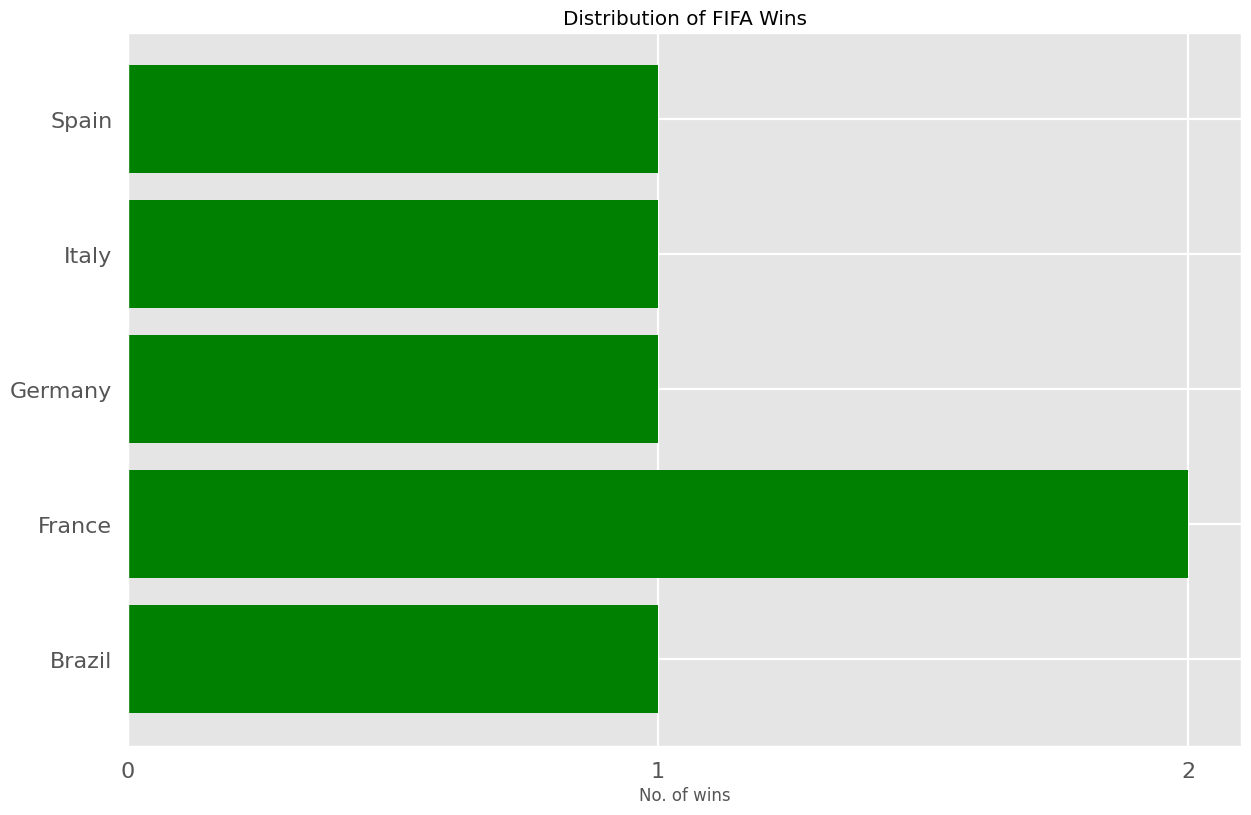

<Figure size 1280x880 with 0 Axes>

In [31]:
# A horizontal bar to show distribution of Fifa Winners
from matplotlib import pyplot as plt
plt.style.use('ggplot')
countries_won = results_by_nation.loc[results_by_nation.Won > 0]
plt.barh(countries_won.index, countries_won.Won, color='g')

plt.title('Distribution of FIFA Wins')
plt.xlabel('No. of wins')
plt.xticks(ticks=[0, 1, 2], labels=[0, 1, 2])


plt.show()
plt.clf()

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']